In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [2]:
df=pd.read_csv('/content/export-usja-carquefou-roller-01_01_1753-31_12_9999 (2).csv',sep=';')

In [3]:
df.tail()

,Numéro,Campagne,Type,Désignation,Date,Montant,Code Promo,Statut,Moyen de paiement,Attestation,...,Email,Date de naissance,Commentaire,Numéro de reçu,Nom acheteur,Prénom acheteur,Adresse acheteur,Code Postal acheteur,Ville acheteur,Pays acheteur
179,5,Gala 2022 USJA Roller,Inscription,Représentation 19h45 - 12 ans et plus,08/04/2022 12:07:00,"8,00",NaN,Validé,Carte bancaire,https://www.helloasso.com/associations/usja-ca...,...,mimosa.suzette@gmail.com,08/04/2022,NaN,NaN,Campbell,Roselyne,NaN,NaN,NaN,FRA
180,4,Gala 2022 USJA Roller,Inscription,Représentation 19h45 - 12 ans et plus,08/04/2022 12:07:00,"8,00",NaN,Validé,Carte bancaire,https://www.helloasso.com/associations/usja-ca...,...,mimosa.suzette@gmail.com,08/04/2022,NaN,NaN,Campbell,Roselyne,NaN,NaN,NaN,FRA
181,3,Gala 2022 USJA Roller,Inscription,Représentation 19h45 - 12 ans et plus,08/04/2022 11:51:00,"8,00",NaN,Validé,Carte bancaire,https://www.helloasso.com/associations/usja-ca...,...,mariana.campbellguenot@gmail.com,08/01/1982,NaN,NaN,CAMPBELL-GUÉNOT,Mariana,NaN,NaN,NaN,FRA
182,2,Gala 2022 USJA Roller,Inscription,Représentation 19h45 - 5-11 ans,08/04/2022 11:51:00,"6,00",NaN,Validé,Carte bancaire,https://www.helloasso.com/associations/usja-ca...,...,mariana.campbellguenot@gmail.com,08/01/1982,NaN,NaN,CAMPBELL-GUÉNOT,Mariana,NaN,NaN,NaN,FRA
183,1,Gala 2022 USJA Roller,Inscription,Représentation 19h45 - 12 ans et plus,08/04/2022 11:51:00,"8,00",NaN,Validé,Carte bancaire,https://www.helloasso.com/associations/usja-ca...,...,mariana.campbellguenot@gmail.com,08/01/1982,NaN,NaN,CAMPBELL-GUÉNOT,Mariana,NaN,NaN,NaN,FRA


In [4]:
df['Montant'].value_counts()

8,00     82
6,00     69
3,00     17
0,00      7
5,00      6
10,00     2
20,00     1
Name: Montant, dtype: int64

In [ ]:
df.columns

Index(['Numéro', 'Campagne', 'Type', 'Désignation', 'Date', 'Montant',
       'Code Promo', 'Statut', 'Moyen de paiement', 'Attestation', 'Reçu',
       'Don anonyme', 'Nom', 'Prénom', 'Société', 'Adresse', 'Code Postal',
       'Ville', 'Pays', 'Email', 'Date de naissance', 'Commentaire',
       'Numéro de reçu', 'Nom acheteur', 'Prénom acheteur', 'Adresse acheteur',
       'Code Postal acheteur', 'Ville acheteur', 'Pays acheteur'],
      dtype='object')

In [5]:
# Transformation de la colonne montant en nombre
df['Montant']=df['Montant'].apply(lambda x : str(x.replace(',','.')))
df['Montant']=df['Montant'].astype('float64')
df.head()

,Numéro,Campagne,Type,Désignation,Date,Montant,Code Promo,Statut,Moyen de paiement,Attestation,...,Email,Date de naissance,Commentaire,Numéro de reçu,Nom acheteur,Prénom acheteur,Adresse acheteur,Code Postal acheteur,Ville acheteur,Pays acheteur
0,184,Gala 2022 USJA Roller,Inscription,Représentation 19h45 - 12 ans et plus,29/04/2022 10:04:00,8.0,NaN,Validé,Carte bancaire,https://www.helloasso.com/associations/usja-ca...,...,philippe.brenaget@orange.fr,12/06/1974,NaN,NaN,Brenaget,Agnes,NaN,NaN,NaN,FRA
1,183,Gala 2022 USJA Roller,Inscription,Représentation 19h45 - 12 ans et plus,29/04/2022 10:04:00,8.0,NaN,Validé,Carte bancaire,https://www.helloasso.com/associations/usja-ca...,...,philippe.brenaget@orange.fr,12/06/1974,NaN,NaN,Brenaget,Agnes,NaN,NaN,NaN,FRA
2,182,Gala 2022 USJA Roller,Inscription,Représentation 19h45 - 12 ans et plus,29/04/2022 10:04:00,8.0,NaN,Validé,Carte bancaire,https://www.helloasso.com/associations/usja-ca...,...,philippe.brenaget@orange.fr,12/06/1974,NaN,NaN,Brenaget,Agnes,NaN,NaN,NaN,FRA
3,181,Gala 2022 USJA Roller,Inscription,Représentation 19h45 - 12 ans et plus,29/04/2022 10:04:00,8.0,NaN,Validé,Carte bancaire,https://www.helloasso.com/associations/usja-ca...,...,philippe.brenaget@orange.fr,12/06/1974,NaN,NaN,Brenaget,Agnes,NaN,NaN,NaN,FRA
4,180,Gala 2022 USJA Roller,Inscription,Représentation 19h45 - 12 ans et plus,29/04/2022 10:04:00,8.0,NaN,Validé,Carte bancaire,https://www.helloasso.com/associations/usja-ca...,...,philippe.brenaget@orange.fr,12/06/1974,NaN,NaN,Brenaget,Agnes,NaN,NaN,NaN,FRA


In [6]:
df['Montant'].sum()

1191.0

In [7]:
# Création de 2 nouvelles coonnes pour séparer l'heure de la représentation et l'âge
df['horaire']=df['Désignation'].str.split("-",expand=True)[0]
df['age']=df['Désignation'].str.split("-",expand=True)[1]
df.head()

,Numéro,Campagne,Type,Désignation,Date,Montant,Code Promo,Statut,Moyen de paiement,Attestation,...,Commentaire,Numéro de reçu,Nom acheteur,Prénom acheteur,Adresse acheteur,Code Postal acheteur,Ville acheteur,Pays acheteur,horaire,age
0,184,Gala 2022 USJA Roller,Inscription,Représentation 19h45 - 12 ans et plus,29/04/2022 10:04:00,8.0,NaN,Validé,Carte bancaire,https://www.helloasso.com/associations/usja-ca...,...,NaN,NaN,Brenaget,Agnes,NaN,NaN,NaN,FRA,Représentation 19h45,12 ans et plus
1,183,Gala 2022 USJA Roller,Inscription,Représentation 19h45 - 12 ans et plus,29/04/2022 10:04:00,8.0,NaN,Validé,Carte bancaire,https://www.helloasso.com/associations/usja-ca...,...,NaN,NaN,Brenaget,Agnes,NaN,NaN,NaN,FRA,Représentation 19h45,12 ans et plus
2,182,Gala 2022 USJA Roller,Inscription,Représentation 19h45 - 12 ans et plus,29/04/2022 10:04:00,8.0,NaN,Validé,Carte bancaire,https://www.helloasso.com/associations/usja-ca...,...,NaN,NaN,Brenaget,Agnes,NaN,NaN,NaN,FRA,Représentation 19h45,12 ans et plus
3,181,Gala 2022 USJA Roller,Inscription,Représentation 19h45 - 12 ans et plus,29/04/2022 10:04:00,8.0,NaN,Validé,Carte bancaire,https://www.helloasso.com/associations/usja-ca...,...,NaN,NaN,Brenaget,Agnes,NaN,NaN,NaN,FRA,Représentation 19h45,12 ans et plus
4,180,Gala 2022 USJA Roller,Inscription,Représentation 19h45 - 12 ans et plus,29/04/2022 10:04:00,8.0,NaN,Validé,Carte bancaire,https://www.helloasso.com/associations/usja-ca...,...,NaN,NaN,Brenaget,Agnes,NaN,NaN,NaN,FRA,Représentation 19h45,12 ans et plus


No handles with labels found to put in legend.


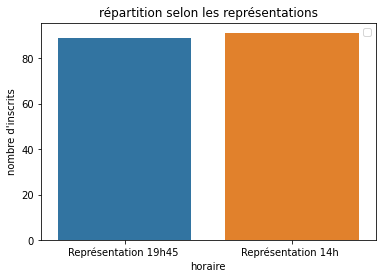

In [8]:
ax=sns.countplot(x='horaire', data=df)
plt.title('répartition selon les représentations')
plt.ylabel("nombre d'inscrits")
plt.legend()

#ax.bar_label(ax.containers[0])
plt.show()

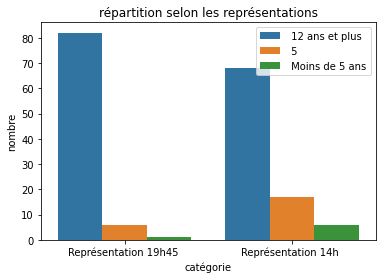

In [9]:
ax=sns.countplot(x='horaire',hue='age', data=df)
plt.title('répartition selon les représentations')
plt.xlabel('catégorie')
plt.ylabel('nombre')
plt.legend()

#ax.bar_label(ax.containers[0])
plt.show()

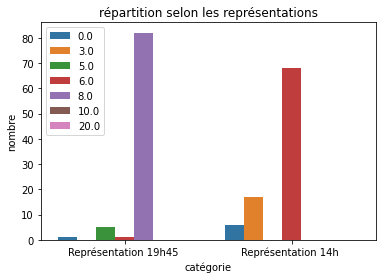

In [10]:
plt.figsize=(10,10)
sns.countplot(x='horaire',hue='Montant', data=df)
plt.title('répartition selon les représentations')
plt.xlabel('catégorie')
plt.ylabel('nombre')
plt.legend()
plt.show()

In [12]:
df_val_count2=df['horaire'].value_counts().rename_axis('représentations').reset_index(name='nombre')
df_val_count2

,représentations,nombre
0,Représentation 14h,91
1,Représentation 19h45,89


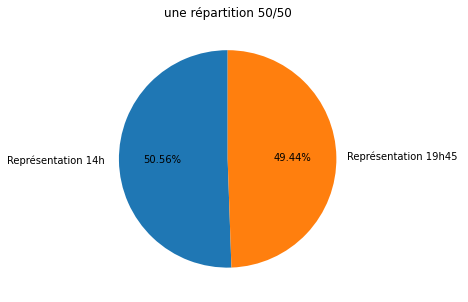

In [13]:
plt.figure(figsize=(5,5))
plt.pie(x=df_val_count2.iloc[:,1],data=df_val_count2,labels=df_val_count2.iloc[:,0],startangle=90,autopct='%.2f%%')
#plt.legend(title='Répartition',loc='center right')
plt.title('une répartition 50/50')
plt.show()